In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_quantile(df, q_num=4):
    d = df.copy()
    d['Q'] = pd.qcut(d['mean'], q_num, labels=False)
    return d

In [3]:
def get_grouped_desc(desc_file, multi_r2, multi_mse, name='result', write_result=False):
    desc = pd.read_csv(desc_file, index_col='id')
    r2 = pd.read_csv(multi_r2).iloc[[-1]].T # select the last entry
    mse = pd.read_csv(multi_mse).iloc[[-1]].T

    mse.columns =['mse']
    mse.index.name = 'id'
    mse.index = mse.index.astype(int)

    r2.columns=['r2']
    r2.index.name = 'id'
    r2.index = r2.index.astype(int)

    joined = r2.join(mse, on='id', how='left')
    desc = desc.join(joined, on='id', how='left')

    if write_result:
        desc.to_csv('results/'+name+'.csv', sep=';',doublequote=False, escapechar='\t')

    volume = desc[desc['desc'].str.match('Volume')]
    area = desc[desc['desc'].str.match('Area')]
    grey_white = desc[desc['desc'].str.match('Grey-white')]
    mean_thickness = desc[desc['desc'].str.match('Mean thickness')]
    mean_intensity = desc[desc['desc'].str.match('Mean intensity')]

    # print('total : {}'.format(volume.shape[0] + area.shape[0] + grey_white.shape[0] + mean_thickness.shape[0] + mean_intensity.shape[0]))
    return {
        'volume':volume, 
        'area':area, 
        'grey white':grey_white, 
        'mean thickness':mean_thickness,
        'mean intensity': mean_intensity}

In [4]:
desc_file = '../csv/idps_desc.csv'

In [5]:
multi_r2 = 'sfcn_pyramid_avg_plat_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_avg_plat_test_multi_mse.csv'
sfcn_pyr_avg = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [6]:
multi_r2 = 'sfcn_pyramid_nopool_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_nopool_test_multi_mse.csv'
sfcn_nopool = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [7]:
def boxplot(result_list, names, q_num=4, group='volume'):
    q = list()
    for i in range(len(result_list)):
        df = get_quantile(result_list[i][group], q_num=q_num)
        df['model'] = names[i]
        q.append(df[['r2', 'mse', 'Q', 'model']].reset_index(drop=True))

    ret = q[0]
    for i in range(1, len(q)):
        ret = pd.concat([ret, q[i]], axis=0)
    
    ax, fig = plt.subplots(ncols=2, nrows=1)

    sns.boxplot(data=ret, x='Q', y='r2', hue='name', ax=ax[0])       
    return ret
    

        


,r2,mse,Q,name
0,0.554831,0.037040,3,avg
1,0.510852,0.041353,3,avg
2,0.500203,0.041966,3,avg
3,0.513727,0.041060,3,avg
4,0.503291,0.042095,3,avg
...,...,...,...,...
627,0.052315,0.079120,0,no pool
628,0.039095,0.078317,0,no pool
629,0.056115,0.080127,0,no pool
630,0.035050,0.080948,0,no pool


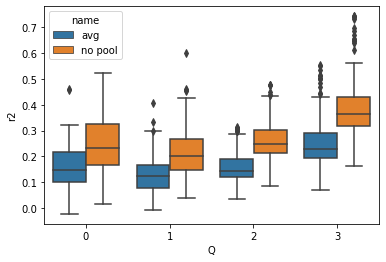

In [8]:
a = boxplot([sfcn_pyr_avg, sfcn_nopool], ['avg', 'no pool'])
pd.DataFrame(a)

<AxesSubplot:>

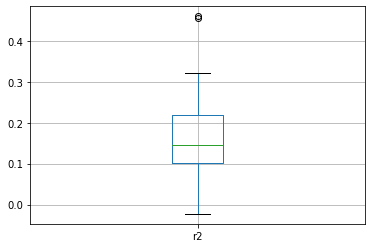

In [51]:

vol_q[vol_q['Q'] == 0].boxplot(column=['r2'])